# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import joblib

In [2]:
constructors = pd.read_csv('constructors.csv')
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')

# Inspection

In [3]:
print(constructors.head())
print('/' * 50)
print(constructors.info())
print('/' * 50)
print(constructors.isnull().sum())

   constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  
//////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   212 non-null    int64 
 1   constructorRef  212 non

In [4]:
print(drivers.head())
print('/' * 50)
print(drivers.info())
print('/' * 50)
print(drivers.isnull().sum())

   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
//////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-

In [5]:
print(qualifying.head())
print('/' * 50)
print(qualifying.info())
print('/' * 50)
print(qualifying.isnull().sum())

   qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236  
//////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10494 entries, 0 to 10493
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10494 non-null  int64 
 1   raceId         10494 non-null  int64 
 2   driverId       10494 non-null  int64 
 3   constructorId 

In [6]:
print(races.head())
print('/' * 50)
print(races.info())
print('/' * 50)
print(races.isnull().sum())

   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       \N       \N       \N       \N       

In [7]:
print(results.head())
print('/' * 50)
print(results.info())
print('/' * 50)
print(results.isnull().sum())

   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3 

# Target Variable

In [8]:
results['is_podium'] = (results['positionOrder']<=3).astype(int)
results['is_podium'].value_counts(normalize=True)

is_podium
0    0.873052
1    0.126948
Name: proportion, dtype: float64

# Merging

In [9]:
df = results.merge(races, on='raceId', how='left')
df = df.merge(constructors, on='constructorId', how='left')
df = df.merge(qualifying, on=['raceId','driverId'], how='left')

# Cleaning

In [10]:
df = df.rename(columns={
    'constructorId_x':'constructorId',
    'position_x':'finish_position',
    'position_y':'qualifying_position',
    'name_y':'constructor_name'
})

In [11]:
columns_to_drop = [
    'constructorId_y',
    'number_x','number_y',
    'time_x','time_y',
    'url_x','url_y',
    'name_x',
    'fp1_date','fp1_time',
    'fp2_date','fp2_time',
    'fp3_date','fp3_time',
    'quali_date','quali_time',
    'sprint_date','sprint_time'
]

df = df.drop(columns=[c for c in columns_to_drop if c in df.columns]) # chatgpt helped with error handling here

# Plotting

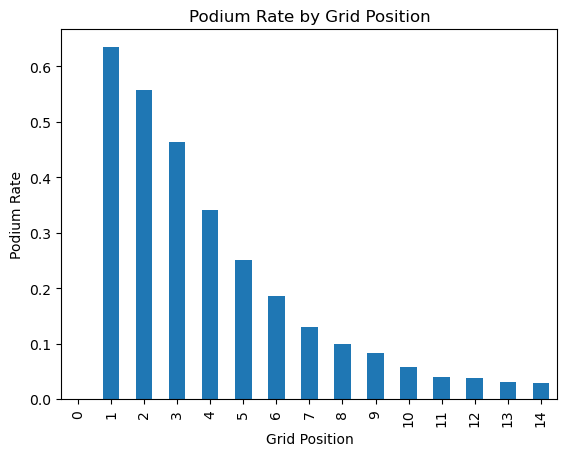

In [12]:
grid_podium = df.groupby('grid')['is_podium'].mean()

plt.figure()
grid_podium.head(15).plot(kind='bar')
plt.ylabel('Podium Rate')
plt.xlabel('Grid Position')
plt.title('Podium Rate by Grid Position')
plt.show()

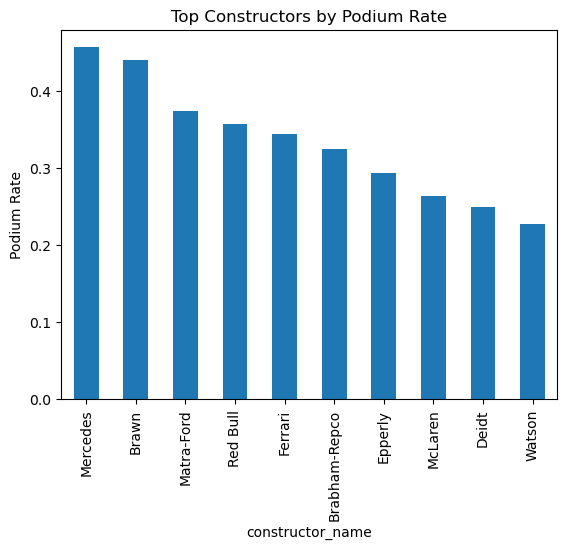

In [13]:
constructor_podium = df.groupby('constructor_name')['is_podium'].mean().sort_values(ascending=False)
plt.figure()
constructor_podium.head(10).plot(kind='bar')
plt.ylabel('Podium Rate')
plt.title('Top Constructors by Podium Rate')
plt.show()

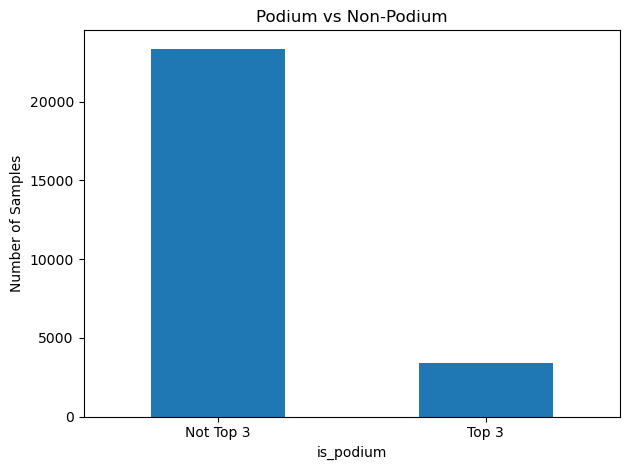

In [14]:
df['is_podium'].value_counts().plot(kind='bar')
plt.xticks([0,1],['Not Top 3','Top 3'],rotation=0)
plt.ylabel('Number of Samples')
plt.title('Podium vs Non-Podium')
plt.tight_layout()
plt.show()

# Feature Set

In [15]:
driver_podium_rate = df.groupby('driverId')['is_podium'].mean()
df['driver_podium_rate'] = df['driverId'].map(driver_podium_rate)

In [16]:
constructor_podium_rate = df.groupby('constructorId')['is_podium'].mean()
df['constructor_podium_rate'] = df['constructorId'].map(constructor_podium_rate)

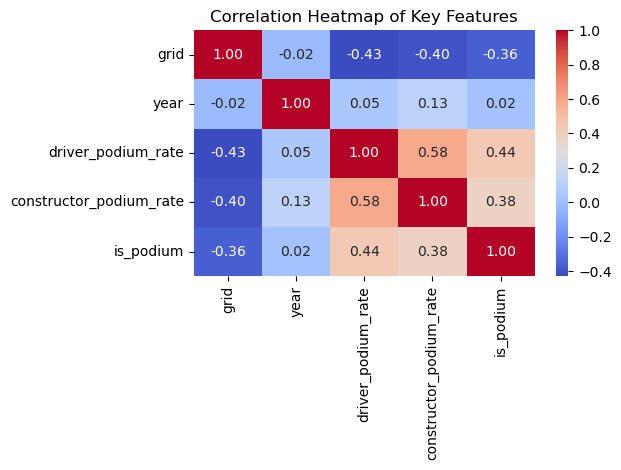

In [17]:
corr_features = [
    'grid',
    'year',
    'driver_podium_rate',
    'constructor_podium_rate',
    'is_podium'
]

sns.heatmap(df[corr_features].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

In [18]:
features = [
    'grid',
    'year',
    'driver_podium_rate',
    'constructor_podium_rate'
]

X = df[features]
y = df['is_podium']

# Train / Test Split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

# Random Forest Classifier

In [20]:
rf_model = RandomForestClassifier(
    n_estimators=200,max_depth=10,class_weight='balanced'
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4575
           1       0.52      0.74      0.61       777

    accuracy                           0.86      5352
   macro avg       0.74      0.81      0.77      5352
weighted avg       0.89      0.86      0.87      5352



# Top-3 Accuracy

In [22]:
def top3_accuracy(df_test,y_prob):
    df_eval = df_test.copy()
    df_eval['prob'] = y_prob
    correct = 0
    total = 0

    for race_id, race_data in df_eval.groupby('raceId'):
        preds = race_data.sort_values('prob',ascending=False).head(3)['driverId']
        actual = race_data[race_data['is_podium']==1]['driverId']
        correct += len(set(preds) & set(actual))
        total += 3

    return correct / total

In [23]:
y_prob = rf_model.predict_proba(X_test)[:,1]
X_test_full = df.loc[X_test.index, ['raceId','driverId','is_podium']]
print('Top-3 Accuracy: ',top3_accuracy(X_test_full,y_prob))

Top-3 Accuracy:  0.6012578616352201


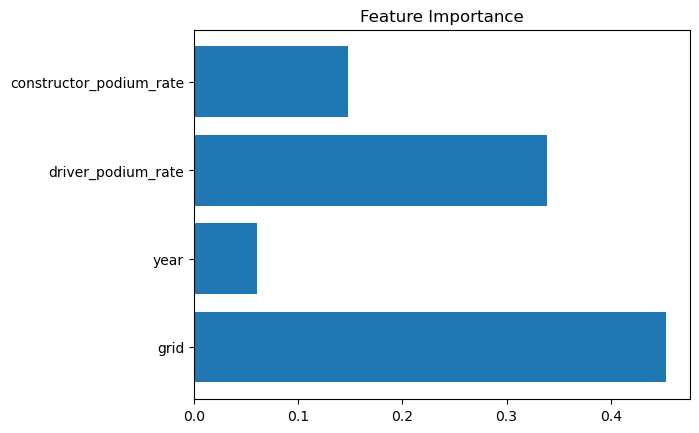

In [24]:
importances = rf_model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

# Saving

In [25]:
joblib.dump(rf_model, 'top3_rf_model.joblib')

In [26]:
joblib.dump(features, "model_features.joblib")